In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# This notebook was run using Python 3.10.7
# Run the notebook from top to bottom

In [24]:
df = pd.read_csv("cars.csv")

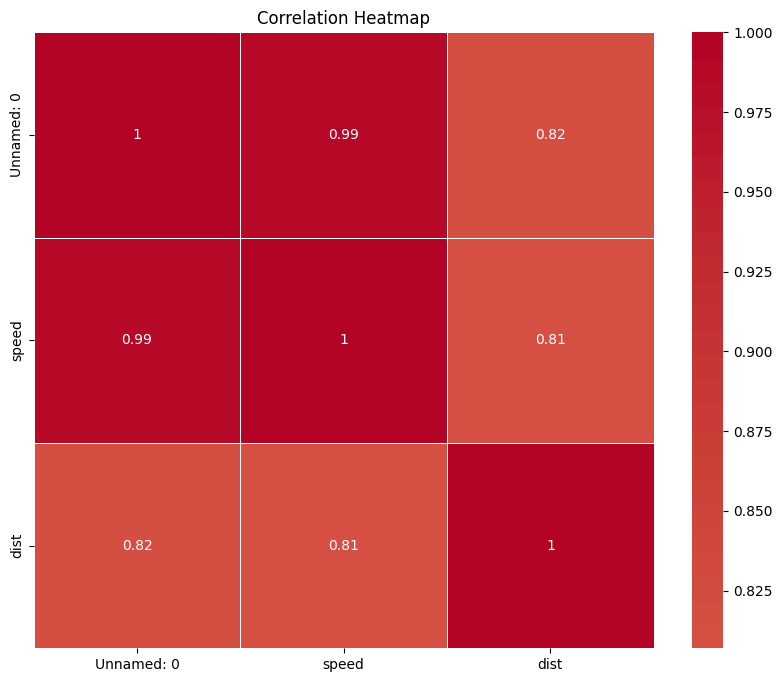

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths = 0.5, center=0)
plt.title("Correlation Heatmap")
plt.show()

We will remove the Unnamed: 0 column, because it would perhaps be qualified as a data leak. It should serve an index.

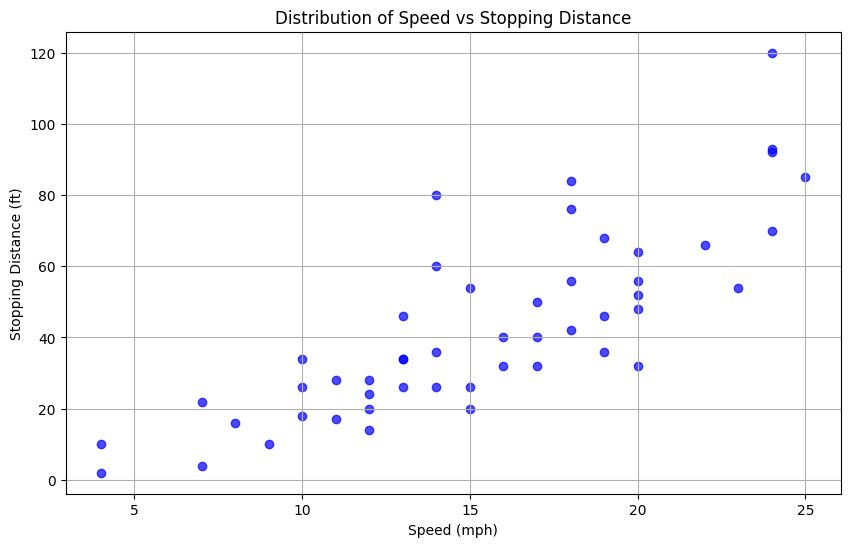

In [26]:
speed = df['speed']
stopping_distance = df['dist']

plt.figure(figsize=(10, 6))
plt.scatter(speed, stopping_distance, color='blue', alpha=0.7)
plt.title('Distribution of Speed vs Stopping Distance')
plt.xlabel('Speed (mph)')
plt.ylabel('Stopping Distance (ft)')
plt.grid(True)
plt.show()

Seems like there's an upwords trend, which makes sense

Checking the distributions

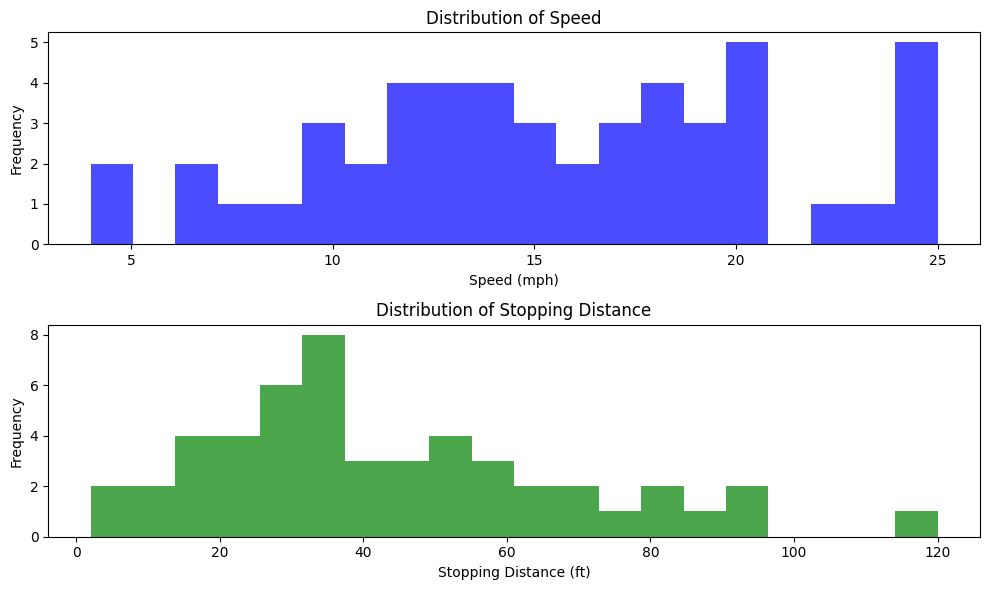

In [27]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(speed, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Speed')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(stopping_distance, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Stopping Distance')
plt.xlabel('Stopping Distance (ft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are some outliers it seems

Ordinary least squares is a statistical method used for estimating the parameters of a linear regression model. In linear regression, the goal is to find the line that best fits the given data points by minimizing the sum of the squared differences between the observed values and the predicted values.

Baseline model:

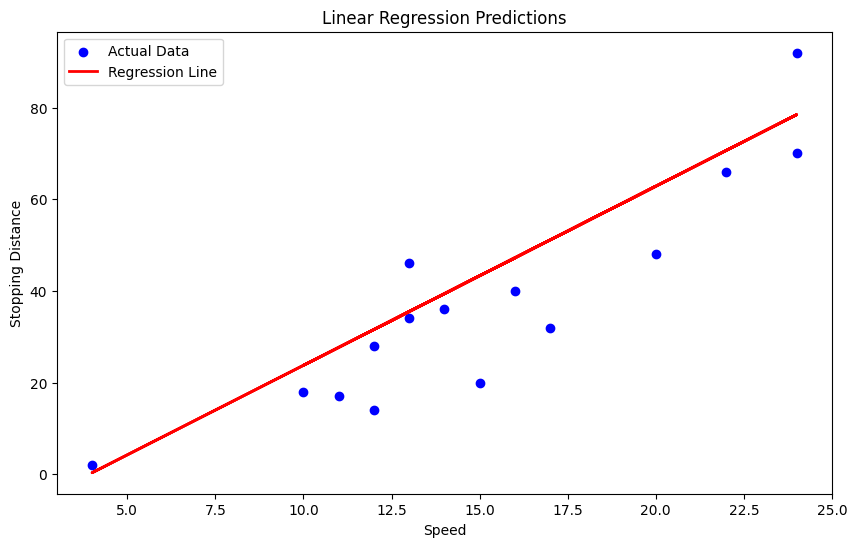

Evaluation Metrics:
R-squared: 0.7459
Root Mean Squared Error: 11.7006
Mean Absolute Error: 9.7216


In [28]:
X = df[['speed']]
y = df['dist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Actual Data", color='blue')
plt.plot(X_test, y_pred, label="Regression Line", color='red', linewidth=2)
plt.xlabel("Speed")
plt.ylabel("Stopping Distance")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

print("Evaluation Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Polynomial trasnformation to better capture the possible non-linear relationships in the data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=27)
reg_model = LinearRegression()

reg_model.fit(X_train, y_train)
y_pred_original = reg_model.predict(X_test)
r2_original = r2_score(y_test, y_pred_original)
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg_model.fit(X_train_poly, y_train)

# Evaluation of the model
y_pred_poly = reg_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Original Features:")
print(f"R-squared: {r2_original:.4f}")
print(f"Root Mean Squared Error: {rmse_original:.4f}")

print("\nPolynomial Features:")
print(f"R-squared: {r2_poly:.4f}")
print(f"Root Mean Squared Error: {rmse_poly:.4f}")

Original Features:
R-squared: 0.7459
Root Mean Squared Error: 11.7006

Polynomial Features:
R-squared: 0.7714
Root Mean Squared Error: 11.0977


R-squared measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.

In general, higher-degree polynomial features can capture more complex relationships between the features and the target variable. However, increasing the degree can also lead to overfitting, where the model becomes too closely tailored to the training data.

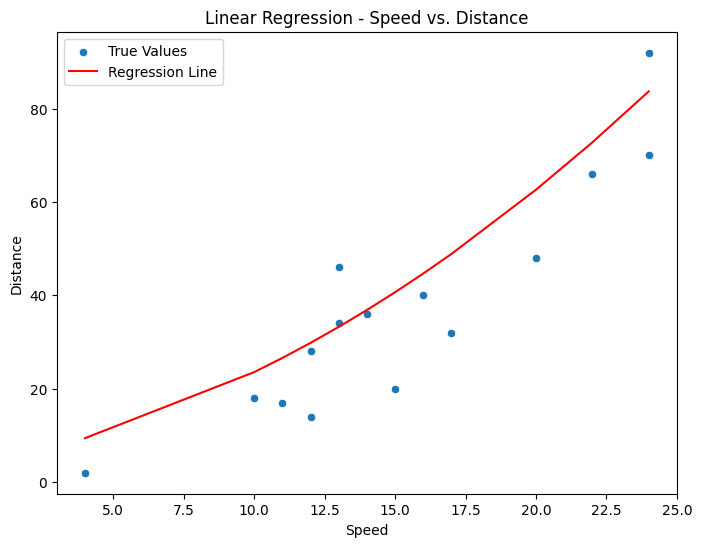

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['speed'], y=y_test, label="True Values")
sns.lineplot(x=X_test['speed'], y=y_pred_poly, color='red', label="Regression Line")
plt.title("Linear Regression - Speed vs. Distance")
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.legend()
plt.show()

This seems okay, and better than the baseline model

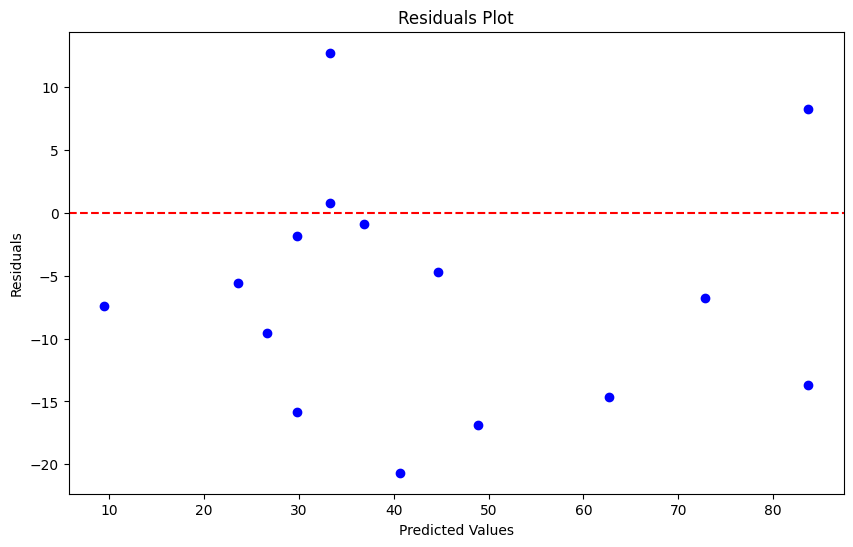

In [33]:
residuals = y_test - y_pred_poly

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

The plot doesn't show strong signs of heteroscedasticity, we can say that the residuals' spread seems relatively consistent across different ranges of predicted values.

A well-behaved residuals plot should show no obvious patterns, with the residuals scattered randomly around the zero line. 

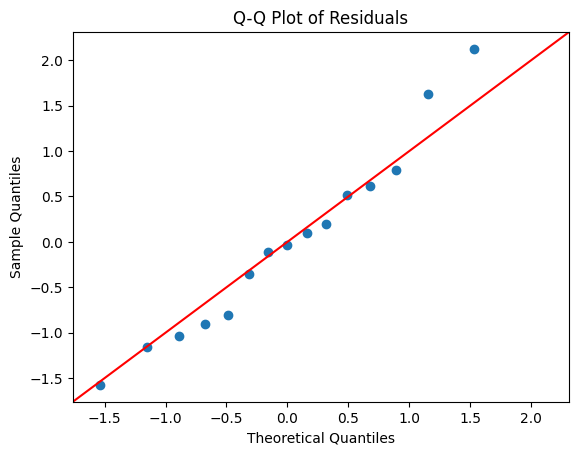

In [34]:
import scipy.stats as stats
import statsmodels.api as sm

# Create Q-Q plot
residuals_standardized = (residuals - residuals.mean()) / residuals.std()
sm.qqplot(residuals_standardized, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

The Q-Q plot helps assess the normality of the residuals. The residuals follow a straight line fairly closely, so it suggests that they are normally distributed. Deviations from the line might indicate departures from normality.

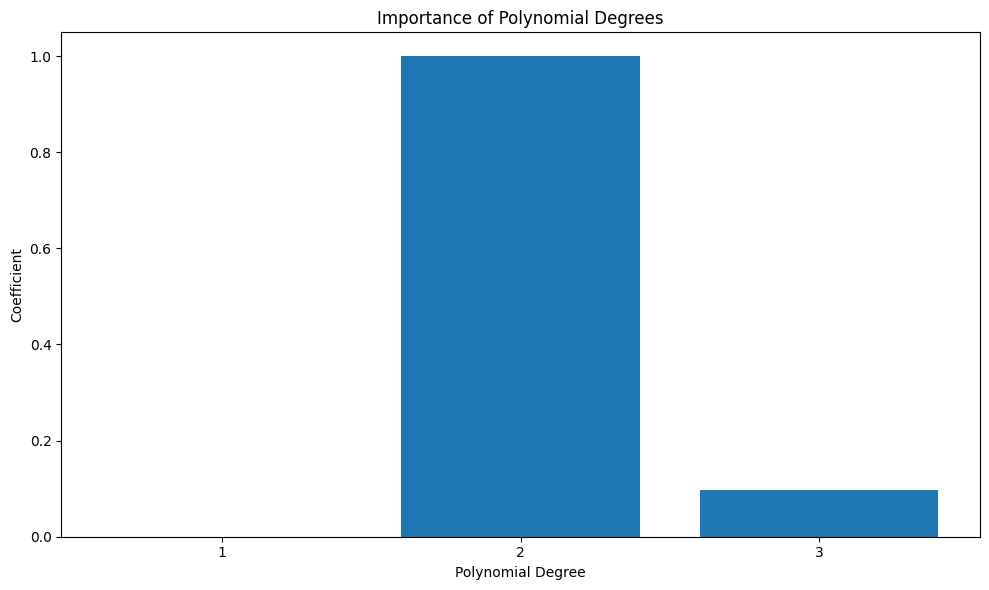

In [35]:
poly_degrees = [1,2,3] 
poly_feature_importances = reg_model.coef_

plt.figure(figsize=(10, 6))
plt.bar(poly_degrees, poly_feature_importances)
plt.xlabel("Polynomial Degree")
plt.ylabel("Coefficient")
plt.title("Importance of Polynomial Degrees")
plt.xticks(poly_degrees)
plt.tight_layout()
plt.show()

In this case, the coefficient of polynomial degree 2 is the biggest, so it suggests that the quadratic term has the most significant impact on predicting the stopping distance based on the speed. This could indicate that the relationship between speed and stopping distance is not perfectly linear, and a quadratic term helps capture the curvature of that relationship more accurately.

There is always a possibility of incorporating domain-specific knowledge (for feature engineering or something else), however, at this time, I do not posses such knowledge that would help out.

What I've tried but not included in the final code:
- Adding features such as inverse of speed
- A logarithmic transformation
- interaction terms to perhaps better capture the possible non-linearity of the data (to no avail)
- Dividing speed into categories (low, medium, high)
- Tried Ordinary least squares